```
Alexander Baquiax
12007988
````

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Ejercicio #1


Juan y Juana Doe están planeando ahorrar dinero para pagar una casa para su hijo de 6 meses, Patrick. Han decidido que les gustaría  tener `$500,000`  ahorrados  para  cuando  Patrick  esté listo para la universidad, dentro de `17 años` a partir de hoy.

Juan y Juana planean ahorrar `$20,000` al año (al comienzo de cada  año,  sin  considerar  impuestos).  Supongamos  que  el rendimiento cada año varía y se extrae de la misma distribución normal  (la  tasa  de  rendimiento  promedio  es  del  `4%`,  la desviación  estándar  también  es  del  `10%`,  es  decir,  una 
desviación estándar en cualquier dirección sería un rendimiento del  -6%  o  un  rendimiento  del  14%).  (Por  lo  tanto,  en  cada intento hay 17 tasas de rendimiento diferentes, una para cada año). 



Ejecute  una  simulación  de  Montecarlo  para  determinar  una estrategia de inversión con al menos 1000 intentos. Adicionalmente determine lo siguiente:

- `Rendimiento` promedio total al finalizar los `17 años`. 
- Monto `promedio acumulado` al finalizar los `17 años`. 
- Escenario de ahorro `pesimista` y `optimista`. 
- Gráfica de los rendimientos obtenidos por cada año. 
- Grafica del monto ahorrado por cada año. 
- Grafica del monto acumulado por cada año dentro de los 17 años.

In [144]:
def simulate(years = 17, monthly_amount=20000, rate_dist =  []):
    rois = []
    savings = []
    rates = []

    total_saving = 0

    for i in range(years):
        saving_rate = random.choice(rate_dist)
        rates.append(saving_rate * 100)

        total_saving += monthly_amount

        roi = total_saving * saving_rate
        rois.append(roi)

        total_saving += roi

        savings.append(total_saving)
    
    return savings, rois, rates

In [145]:
def montecarlo(epochs = 1000,years = 17, saving_per_year = 20000, saving_rate_mean = 0.04, saving_rate_std = 0.1):
    savings = []
    rois = []
    rates = []

    saving_rate_distribution = np.random.normal(saving_rate_mean, saving_rate_std, 20)
    
    for i in range(epochs):
        result = simulate(years = years, monthly_amount=saving_per_year, rate_dist = saving_rate_distribution)

        savings.append(result[0])
        rois.append(result[1])    
        rates.append(result[2])

    return savings, rois, rates

##### Simulación Montecarlo

In [146]:
result = montecarlo(epochs= 100, years = 17, saving_per_year = 20000, saving_rate_mean = 0.04, saving_rate_std = 0.1)

savings = result[0]
rois = result[1]
rates = result[2]

#### `Rendimiento` promedio total al finalizar los `17 años`. 

In [147]:
totals = []
for i in rois:
    totals.append(sum(i))

np.average(totals)

745.0742667998217

#### Monto `promedio acumulado` al finalizar los `17 años`. 

In [148]:
totals = []
for i in savings:
    totals.append(i[-1])

np.average(totals)

340745.0742667998

#### Escenario de ahorro `pesimista` y `optimista`. 


In [149]:
total_savings = [sum(x) for x in savings]
print(f"Optimista {max(total_savings)}")
print(f"Pesimista {min(total_savings)}")

Optimista 4094619.783790794
Pesimista 2241728.364181832


#### Gráfica de los rendimientos obtenidos por cada año. 


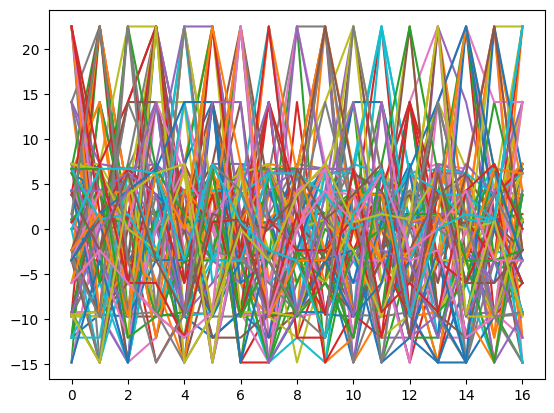

In [150]:
for epoch in rates:
    plt.plot(epoch)

#### Grafica del monto ahorrado por cada año. 

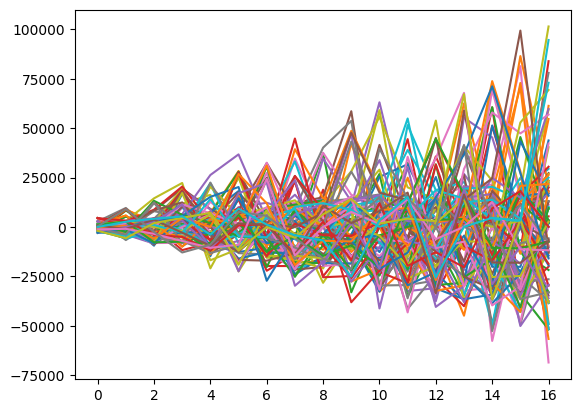

In [151]:
for epoch in rois:
    plt.plot(epoch)

#### Grafica del monto acumulado por cada año dentro de los 17 años.

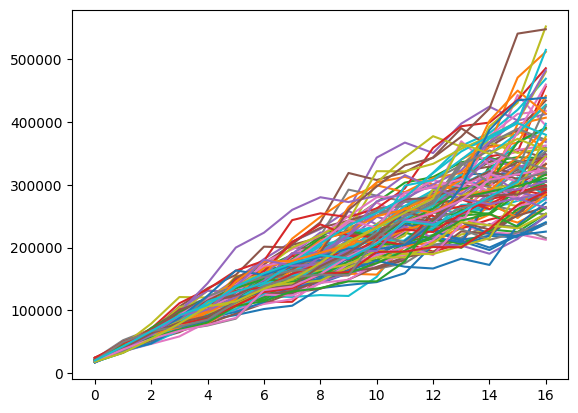

In [152]:
for epoch in savings:
    plt.plot(epoch)